In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
import pylab as pl
%matplotlib inline

### 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [2]:
df_train = pd.read_csv('train.csv')

### 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

~アイオワ州エイムズの住宅のほぼすべての側面を記述した79の説明変数

~各家の販売価格(SalePrice)を予測するためのデータセット

~各家のクオリティを示す説明変数や、近隣の路地、幹線道路への近接性などの家自体以外の変数もある

~家の材料と仕上げの品質、フェンスの品質等もありデータの性質の幅が広い

### 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。


- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

### 各特徴量がどういったものかを見る。（数値データか文字データなど）

~数値データ、文字データとも見受けられる。西暦のようなデータや浮動小数点のデータもある。

~また、NaNという前回では見られなかった欠損値もこの段階で確認出来ている。

~データの欠損ばかりの特徴量のものもありそう。

~説明変数と、そこに記されている値だけでは良し悪しを判断出来なそうなものもいくつか見受けられる。

~データの値に対する価値を調べながら進める必要性もありそうなことが予想される。

In [3]:
pd.set_option('display.max_columns', 100)
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### 今回の目的変数はどの列か確認する。

目的変数は、最終列の「SalePrice」。

目的変数とは・・・　y　=　x　の　y　のようなものである。

問題2の中で「各家の販売価格(SalePrice)※y を予測するためのデータセット※x」と調査出来たため。

### 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
 
~上記で行った調査に対してデータ量が減ったため、オブジェクトデータが多かったことが予想される
 
~大体の特徴量が、大きさか、年数を表すものだと思われる

~家の価格の平均は約2000万円。中古戸建てが多そう。

In [23]:
pd.set_option('display.max_columns', 100)
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

In [5]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [6]:
import missingno as msno

### 各特徴量の欠損値の有無を確認する。

~msno.matrixを行うことでどのあたりの特徴量に欠損値が出ているかが分かった

~欠損値が出ている特徴量同士が影響を与えていることも考えられそう

~ 家のデータ毎(行レベル)の非欠損値は66個〜80個になっている

~heatmapでは地下や車庫の大きさや有無が、地下や車庫関係の欠損値に高い相関関係があることがわかる（当たり前だが）

~dendrogramは見方が分からない

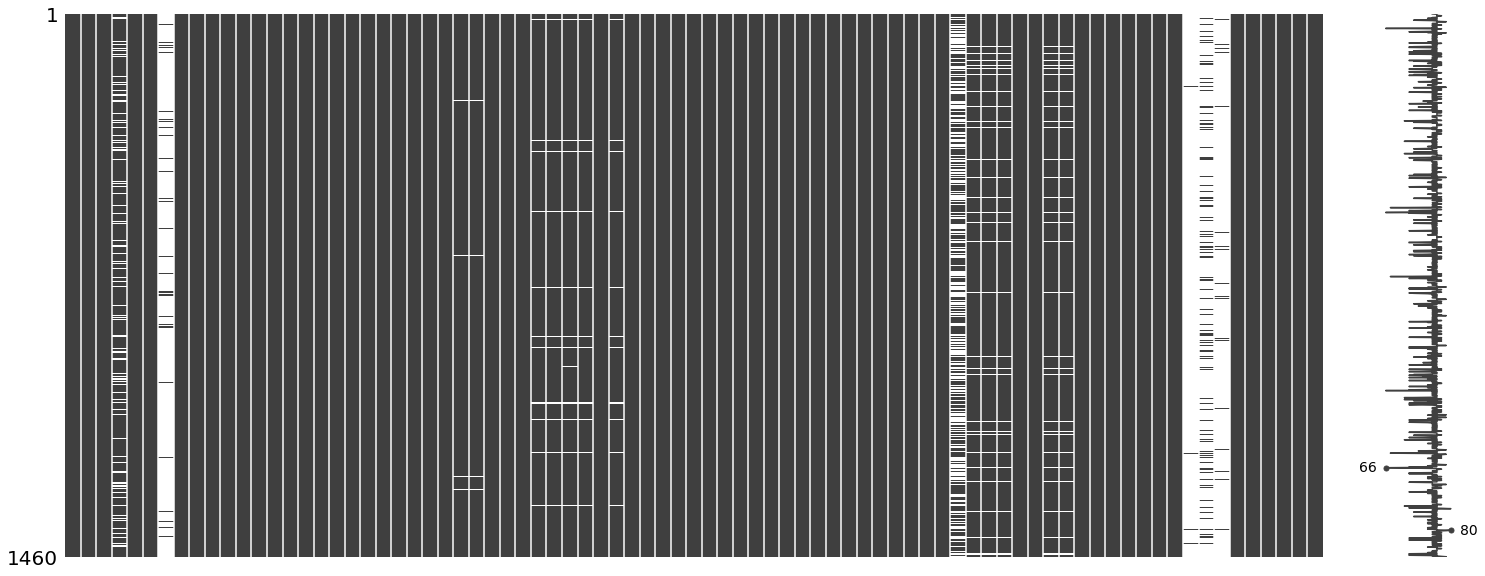

In [7]:
msno.matrix(df_train);

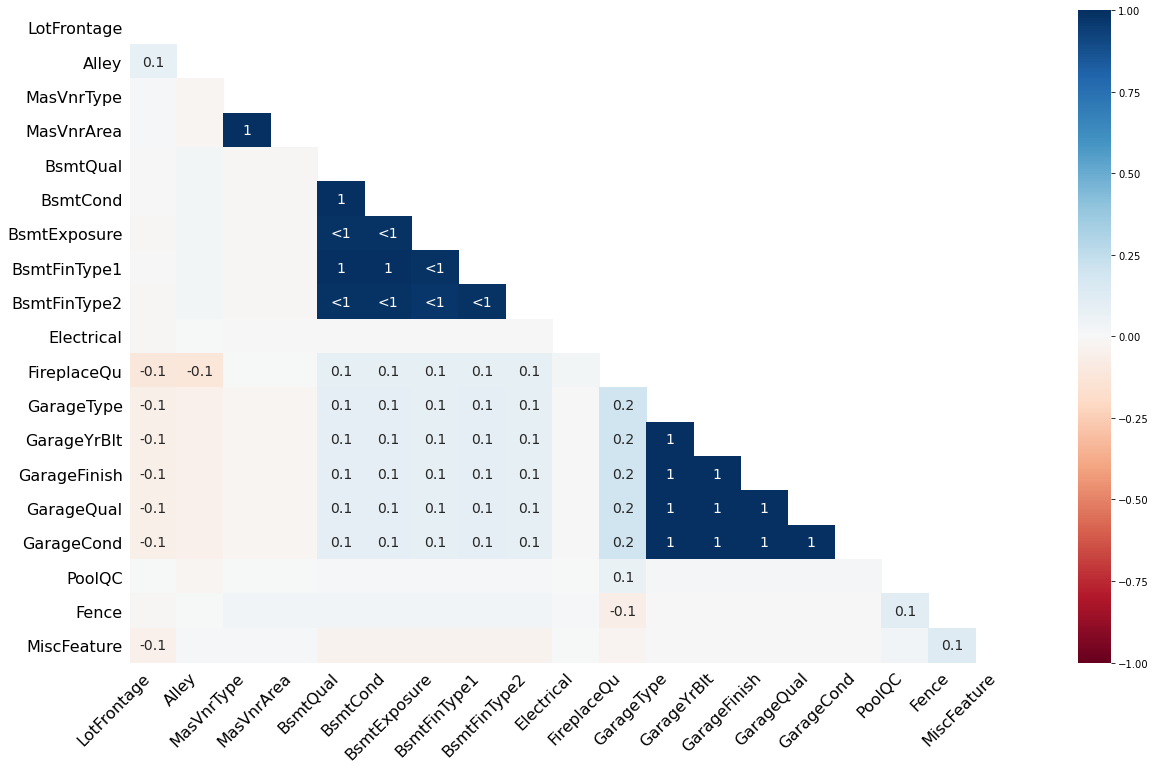

In [8]:
msno.heatmap(df_train);

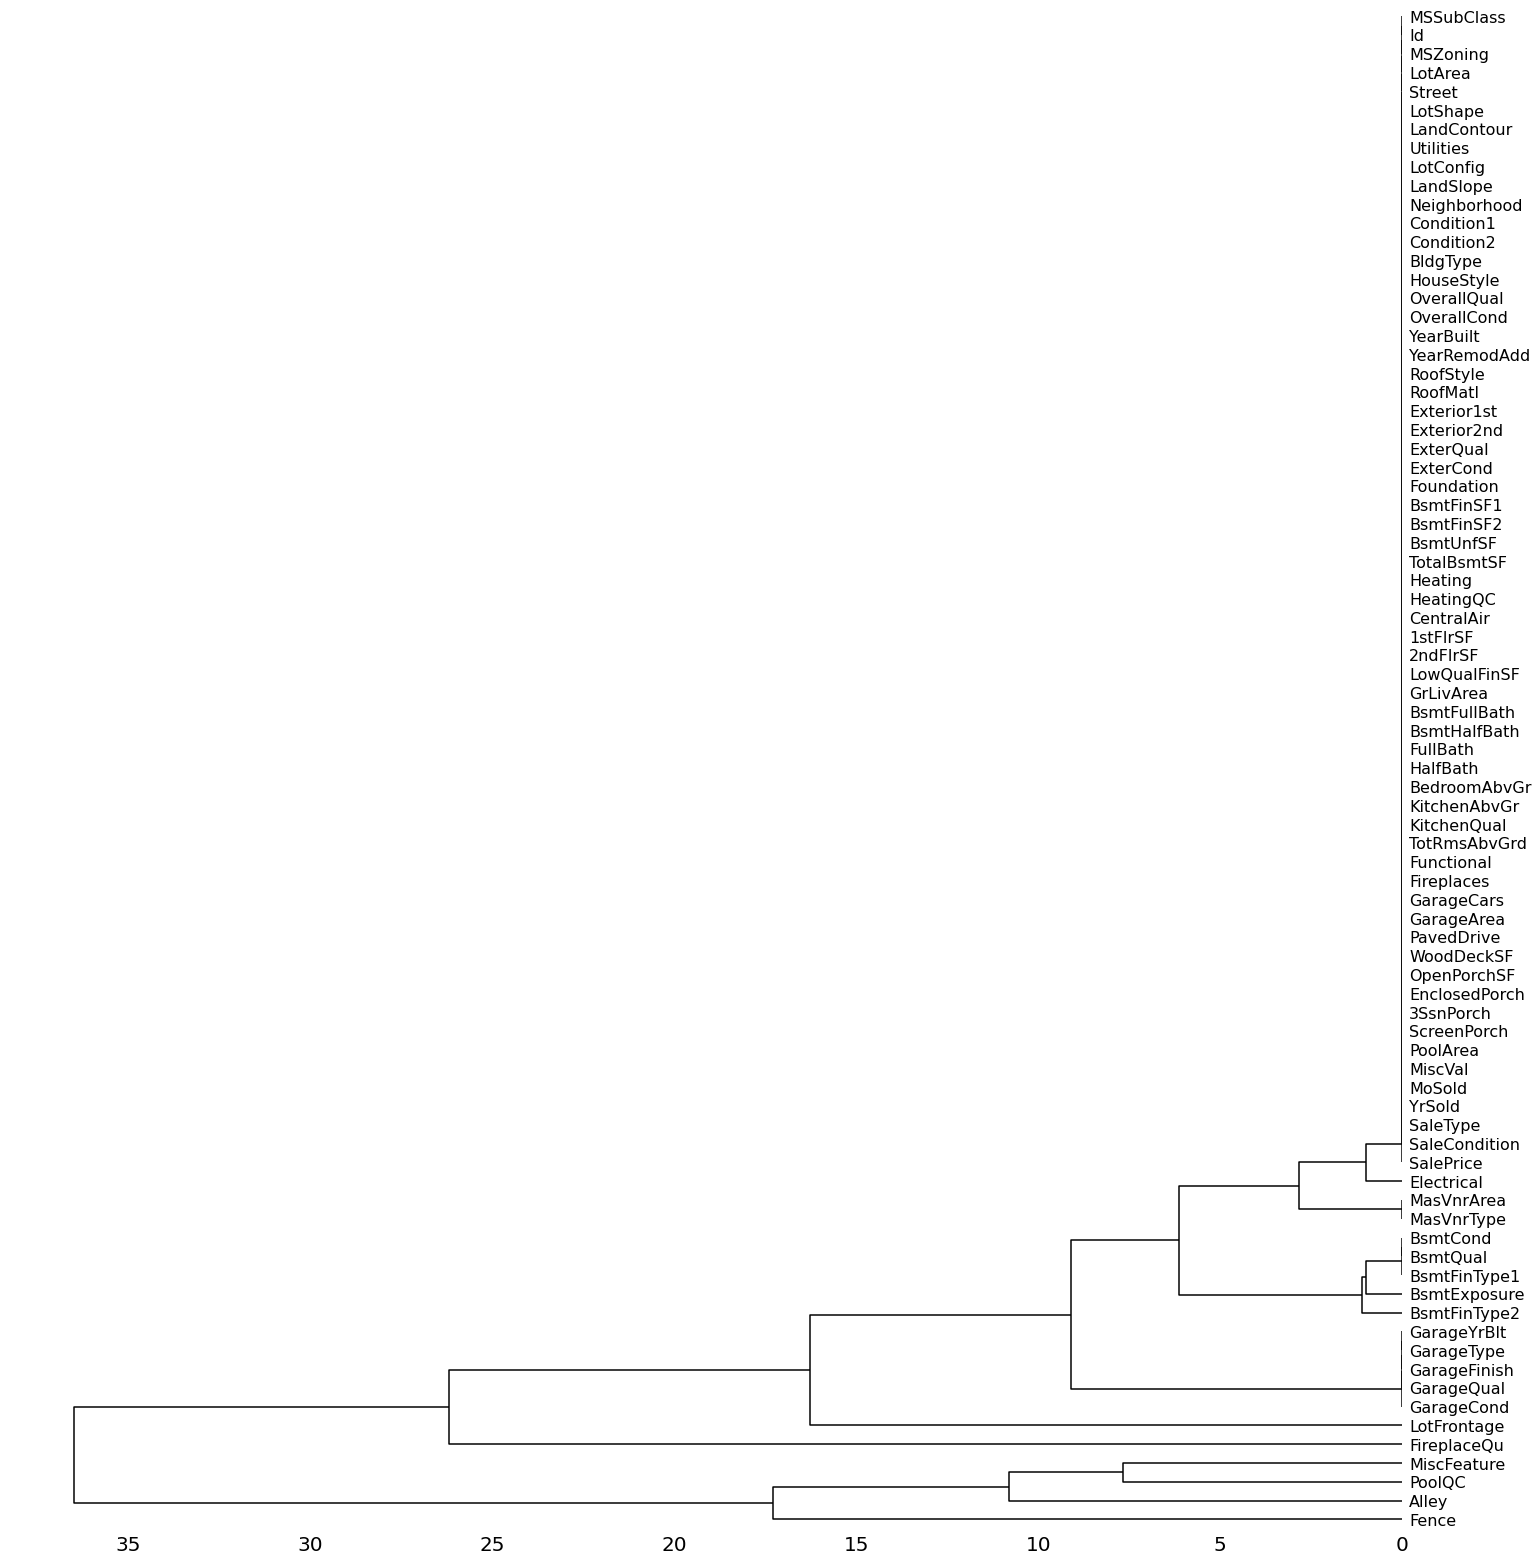

In [9]:
msno.dendrogram(df_train);

### 欠損値が何パーセント含まれるかを確認する。

~プールがある家が極端に少ない

In [31]:
null_count = df_train.isnull().sum()
null_rate = null_count / len(df_train)

null_table = pd.DataFrame({
    'null_couunt': null_count,
    'null_rate': null_rate
})

null_table.sort_values(by='null_rate', ascending=False)

null_couunt  null_rate
PoolQC                1453   0.995205
MiscFeature           1406   0.963014
Alley                 1369   0.937671
Fence                 1179   0.807534
FireplaceQu            690   0.472603
LotFrontage            259   0.177397
GarageYrBlt             81   0.055479
GarageCond              81   0.055479
GarageType              81   0.055479
GarageFinish            81   0.055479
GarageQual              81   0.055479
BsmtFinType2            38   0.026027
BsmtExposure            38   0.026027
BsmtQual                37   0.025342
BsmtCond                37   0.025342
BsmtFinType1            37   0.025342
MasVnrArea               8   0.005479
MasVnrType               8   0.005479
Electrical               1   0.000685
Id                       0   0.000000
Functional               0   0.000000
Fireplaces               0   0.000000
KitchenQual              0   0.000000
KitchenAbvGr             0   0.000000
BedroomAbvGr             0   0.000000
HalfBath                 0   0.000000
FullBath                 0   0.000000
BsmtHalfBath             0   0.000000
TotRmsAbvGrd             0   0.000000
GarageCars               0   0.000000
GrLivArea                0   0.000000
GarageArea               0   0.000000
PavedDrive               0   0.000000
WoodDeckSF               0   0.000000
OpenPorchSF              0   0.000000
EnclosedPorch            0   0.000000
3SsnPorch                0   0.000000
ScreenPorch              0   0.000000
PoolArea                 0   0.000000
MiscVal                  0   0.000000
MoSold                   0   0.000000
YrSold                   0   0.000000
SaleType                 0   0.000000
SaleCondition            0   0.000000
BsmtFullBath             0   0.000000
HeatingQC                0   0.000000
LowQualFinSF             0   0.000000
LandSlope                0   0.000000
OverallQual              0   0.000000
HouseStyle               0   0.000000
BldgType                 0   0.000000
Condition2               0   0.000000
Condition1               0   0.000000
Neighborhood             0   0.000000
LotConfig                0   0.000000
YearBuilt                0   0.000000
Utilities                0   0.000000
LandContour              0   0.000000
LotShape                 0   0.000000
Street                   0   0.000000
LotArea                  0   0.000000
MSZoning                 0   0.000000
OverallCond              0   0.000000
YearRemodAdd             0   0.000000
2ndFlrSF                 0   0.000000
BsmtFinSF2               0   0.000000
1stFlrSF                 0   0.000000
CentralAir               0   0.000000
MSSubClass               0   0.000000
Heating                  0   0.000000
TotalBsmtSF              0   0.000000
BsmtUnfSF                0   0.000000
BsmtFinSF1               0   0.000000
RoofStyle                0   0.000000
Foundation               0   0.000000
ExterCond                0   0.000000
ExterQual                0   0.000000
Exterior2nd              0   0.000000
Exterior1st              0   0.000000
RoofMatl                 0   0.000000
SalePrice                0   0.000000

### 5つ以上欠損値がある特徴量（列）は削除する。

In [11]:
'''
この問題はthreshを利用して解くものなのだろうか。
遠回りしている気がする。
'''

pd.set_option('display.max_rows', 1500)
df_train.dropna(thresh=1456, axis='columns')

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
5        6          50       RL    14115   Pave      IR1         Lvl   
6        7          20       RL    10084   Pave      Reg         Lvl   
7        8          60       RL    10382   Pave      IR1         Lvl   
8        9          50       RM     6120   Pave      Reg         Lvl   
9       10         190       RL     7420   Pave      Reg         Lvl   
10      11          20       RL    11200   Pave      Reg         Lvl   
11      12          60       RL    11924   Pave      IR1         Lvl   
12      13          20       RL    12968   Pave      IR2         Lvl   
13      14          20       RL    10652   Pave      IR1         Lvl   
14      15          20       RL    10920   Pave      IR1         Lvl   
15      16          45       RM     6120   Pave      Reg         Lvl   
16      17          20       RL    11241   Pave      IR1         Lvl   
17      18          90       RL    10791   Pave      Reg         Lvl   
18      19          20       RL    13695   Pave      Reg         Lvl   
19      20          20       RL     7560   Pave      Reg         Lvl   
20      21          60       RL    14215   Pave      IR1         Lvl   
21      22          45       RM     7449   Pave      Reg         Bnk   
22      23          20       RL     9742   Pave      Reg         Lvl   
23      24         120       RM     4224   Pave      Reg         Lvl   
24      25          20       RL     8246   Pave      IR1         Lvl   
25      26          20       RL    14230   Pave      Reg         Lvl   
26      27          20       RL     7200   Pave      Reg         Lvl   
27      28          20       RL    11478   Pave      Reg         Lvl   
28      29          20       RL    16321   Pave      IR1         Lvl   
29      30          30       RM     6324   Pave      IR1         Lvl   
30      31          70  C (all)     8500   Pave      Reg         Lvl   
31      32          20       RL     8544   Pave      IR1         Lvl   
32      33          20       RL    11049   Pave      Reg         Lvl   
33      34          20       RL    10552   Pave      IR1         Lvl   
34      35         120       RL     7313   Pave      Reg         Lvl   
35      36          60       RL    13418   Pave      Reg         Lvl   
36      37          20       RL    10859   Pave      Reg         Lvl   
37      38          20       RL     8532   Pave      Reg         Lvl   
38      39          20       RL     7922   Pave      Reg         Lvl   
39      40          90       RL     6040   Pave      Reg         Lvl   
40      41          20       RL     8658   Pave      Reg         Lvl   
41      42          20       RL    16905   Pave      Reg         Lvl   
42      43          85       RL     9180   Pave      IR1         Lvl   
43      44          20       RL     9200   Pave      IR1         Lvl   
44      45          20       RL     7945   Pave      Reg         Lvl   
45      46         120       RL     7658   Pave      Reg         Lvl   
46      47          50       RL    12822   Pave      IR1         Lvl   
47      48          20       FV    11096   Pave      Reg         Lvl   
48      49         190       RM     4456   Pave      Reg         Lvl   
49      50          20       RL     7742   Pave      Reg         Lvl   
50      51          60       RL    13869   Pave      IR2         Lvl   
51      52          50       RM     6240   Pave      Reg         Lvl   
52      53          90       RM     8472   Grvl      IR2         Bnk   
53      54          20       RL    50271   Pave      IR1         Low   
54      55          80       RL     7134   Pave 

### 欠損値があるサンプル（行）は削除する。

In [12]:
'''
全ての行に欠損値があったっていうことですよね。
'''
df_train.dropna()

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

### 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。


- 尖度
- 歪度

**尖度**

平均値に集中する。尖度が正規分布から正だと山が高くなり、負だと山が緩やかになる。尖っているかどうか。

**歪度**

平均の偏り。歪度が正規分布から負だと左に裾が長くなり、正だと右に裾が長くなる。左右対称かどうか。

両方とも限りなく0に近ければ近いほど良い値。
偏るとマニアックな人に売れているという判断になる。

### 【問題6】分布の確認
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
-対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

### seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

~歪度が右に裾がのびており、尖度も割と尖っているので正規分布になっていない(?)

/Users/misakiryo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


6.509812011089439
1.880940746034036


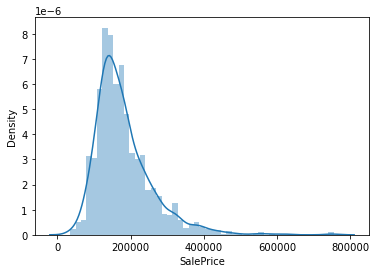

In [24]:
sns.distplot(df_train.SalePrice);
#sns.histplot(df_train_log);
print(kurtosis(df_train.SalePrice))
print(skew(df_train.SalePrice))

### 目的変数に対して対数変換を行う。

In [14]:
'''
対数変換っていう言葉の意味ははっきりしないが、要は正規分布に近づけるための式。
これを行うと、目的変数の対数変換を行い出た値のタイプはデータフレームではなかった
'''

df_train_log = df_train.SalePrice.apply(np.log)
print(type(df_train))
print(type(df_train_log))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

/Users/misakiryo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.8026555069117713
0.1212103673013655


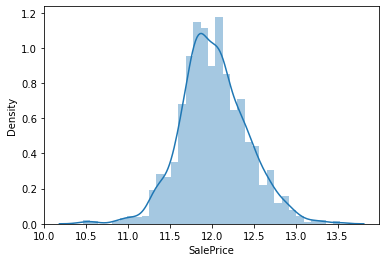

In [25]:
'''
sns.distplot(df_train_log.SalePrice.apply(np.log)
を行ってみると、series相手には出来ないというエラーが出る。
上の対数変換時に何かが起こったと予想する。
タイプを調べると、すでにデータフレームではなくなっていた。
だったら、df_train_log自体に目的変数が入っていて、それが対数変換したのだと仮定する。
それで式を作ってみると出来た。
尖度と歪度も正規分布に近づいている。
'''

#sns.histplot(df_train_log);
sns.distplot(df_train_log);
print(kurtosis(df_train_log))
print(skew(df_train_log))

### 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

- 対数変換前

尖度が特に「正規分布」から正の値（約　6.5）に、すなわち山が鋭く尖っており、歪度も同じく正の値(約1.8)で、右に裾が長くなっており「正規分布」からはずれていた。

- 対数変換後

尖度(約 0.8)、歪度(0.1)ともに「正規分布」の0に先ほどより限りなく近づいた。

### 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。


- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。


### 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

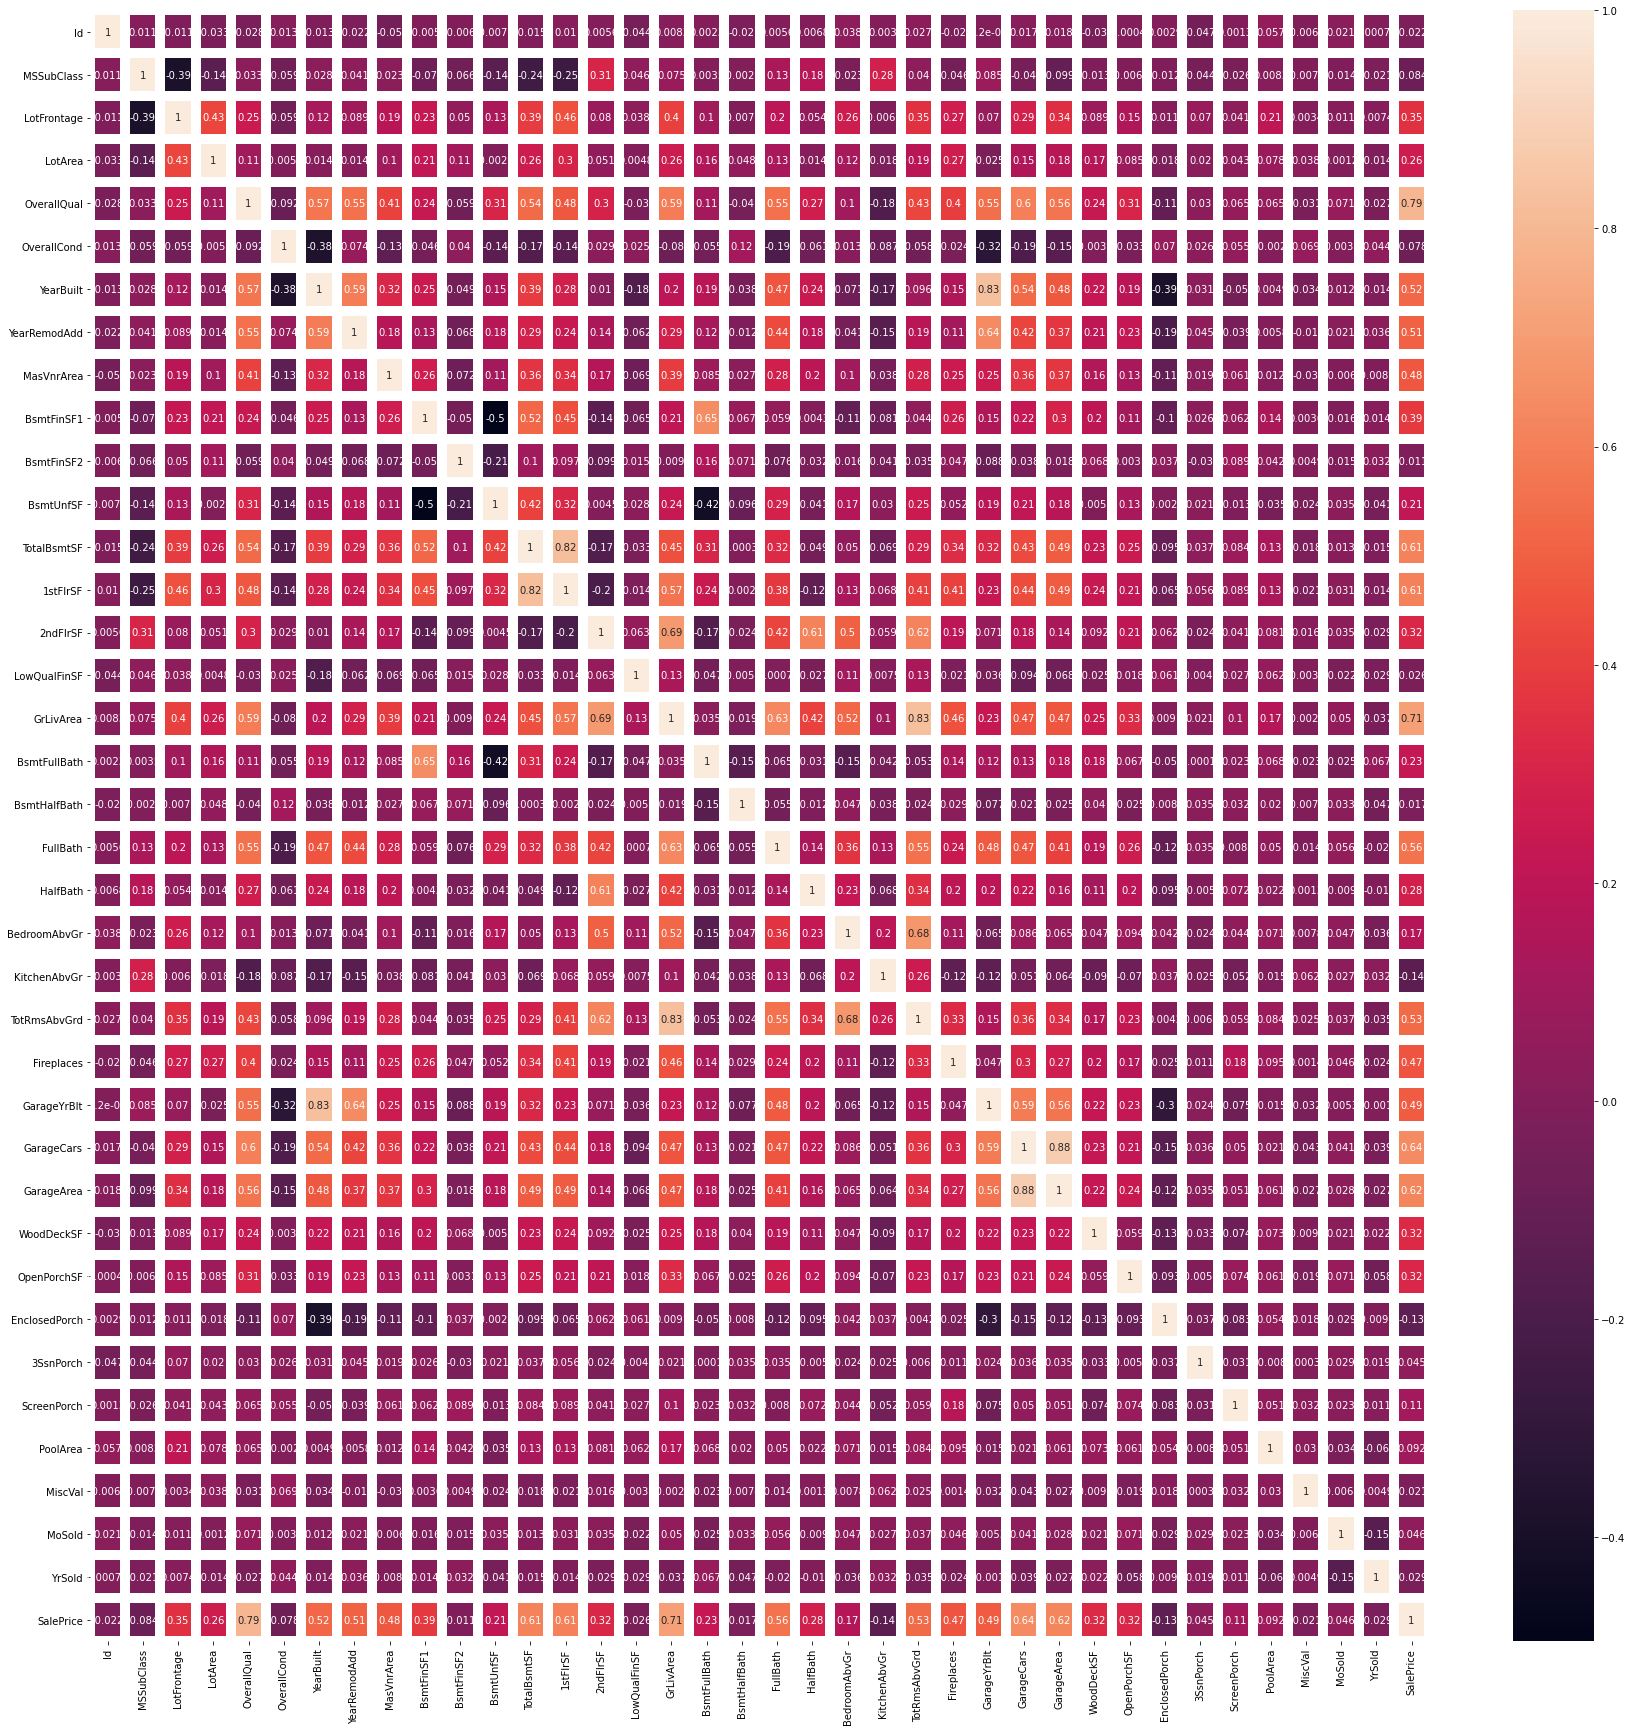

In [16]:
'''
使ってた相関係数行列の式がnp用だったみたいで、それを
DataFrame用のを使い直した
'''

df_train_corr= df_train.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df_train_corr, annot=True, linewidth = 9, ax = ax)
plt.show()

### 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

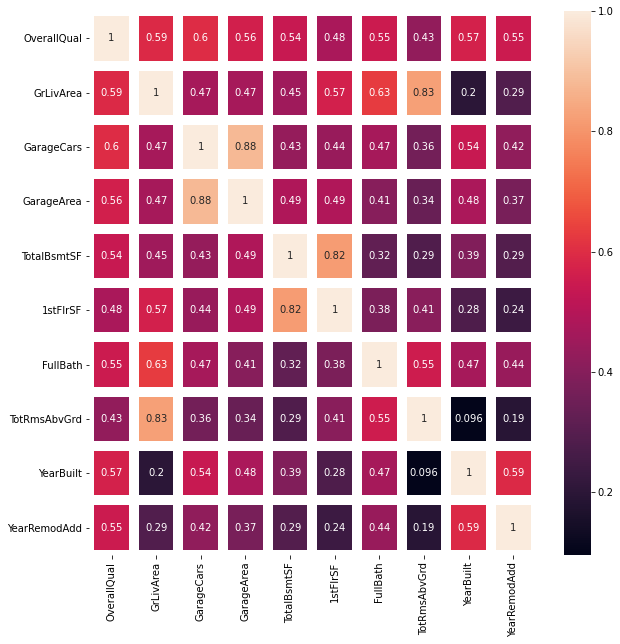

In [17]:
df_corr_saleprice  = df_train_corr["SalePrice"].sort_values(ascending=False) # SalePriceとの相関が高い順にソートしたもの
df_train_high_sort = df_train[df_corr_saleprice[1:11].index] # df_corr_saleprice[1:11].index、で列名だけを抽出できる
df_train_high_sort_corr = df_train_high_sort.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_train_high_sort_corr, annot=True, linewidth = 9, ax = ax)
plt.show()


### 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

- 10個の特徴量の値が大きくなればなるほど、販売価格も上昇していくことがわかる。
- ガレージが大きいと人が住む部屋数も増えるのでここは住む人数に比例し易い
- 再建築日が最近でも建築日が古いと販売価格は上がっていないと思われる
- 家の材料等の品質の向上と他9個の特徴量の相関関係が高い

10個の特徴量

☆家全体の全体的な材料と仕上げの品質

☆当初の建造日

☆再建築日

☆地下室面積の合計平方フィート

☆1階の大きさ

☆リビングエリア平方フィートの上

☆フルバスルームの数

☆人が住めるレベル以上の部屋数

☆車庫に何台車を止められるか

☆車庫の大きさ




<!-- SalePrice - プロパティの売却価格 (ドル)。これは、予測しようとしているターゲット変数です。
MSSubClass。建物クラス。
MSゾーニング。一般的なゾーニングの分類
地積。プロパティに接続されている道路の直線フィート
ロットエリア。敷地面積（平方フィート
通りです。道路アクセスの種類
路地。路地アクセスの種類
ロットシェイプ。物件の一般的な形状
ランドコンター。物件の平面性
ユーティリティ。利用可能なユーティリティの種類
ロットコンフィグ。ロット構成
ランドスロープ。プロパティの斜面
近隣地域。エイムズ市内の物理的な場所
条件1：幹線道路・鉄道への近接性
条件2. 幹線道路や鉄道に近い（セカンドがある場合
BuildingType. 住戸の種類
HouseStyle（ハウススタイル）。住まいのスタイル
☆OverallQual. 全体的な材料と仕上げの品質
オーバーオールコンデション 全体的なコンディション評価
☆建造年。当初の施工日
☆YearRemodAdd. リモデル日
RoofStyle. 屋根の種類
RoofMatl. 屋根材
外装1. 家の外壁を覆う
エクステリア2nd. 家の外壁塗装（複数の材料がある場合
MasVnrTypeです。メイソンリーベニヤタイプ
MasVnrArea. 石積み単板の面積（平方フィート
エクスタークアル 外装材の品質
ExterCond. 外装材の現在の状態
ファンデーションのこと。財団の種類
BsmtQual：地下室の高さ
BsmtCond. 地下室の一般的な状態
BsmtExposure: ウォークアウトまたはガーデンレベルの地下室の壁
BsmtFinType1. 地下室の完成品の品質
BsmtFinSF1。タイプ1完成平方フィート
BsmtFinType2. 第二仕上げエリアの品質（存在する場合
BsmtFinSF2: タイプ2完成平方フィート
BsmtUnfSF：地下室面積の未完成平方フィート
 ☆TotalBsmtSF: 地下室面積の合計平方フィート
暖房のこと。暖房の種類
暖房QC。暖房の品質と状態
セントラルエアー セントラルエアコン
電気：電気システム
☆1stFlrSF：1階角部屋
2ndFlrSF：2階の平方フィート
LowQualFinSF：低品質の完成した平方フィート（全フロア
☆GrLivArea. グレード（地上）リビングエリア平方フィートの上
BsmtFullBath。地下のフルバスルーム
BsmtHalfBath。地下のハーフバスルーム
☆フルバス。グレード以上のフルバスルーム
ハーフバス。グレード以上のハーフバス
ベッドルームの数 地下1階以上のベッドルーム数
キッチンです。キッチンの数
KitchenQual. キッチンクオリティ
☆総部屋数（TotRmsAbvGrd. グレード以上の部屋数（バスルームは含まない
機能性：住宅機能評価
暖炉の数 暖炉の数
暖炉品質 暖炉の品質
ガレージタイプ。車庫の位置
GarageYrBlt. ガレージが建設された年
GarageFinish：ガレージの内装仕上げ
☆ガレージカー。車の容量でのガレージのサイズ
☆ガレージエリア。平方フィートのガレージのサイズ
ガレージクオリティ。ガレージの品質
ガレージコンデション 車庫の状態
PavedDrive。舗装されたドライブウェイ
WoodDeckSF: ウッドデッキ面積（平方フィート
OpenPorchSF: オープンポーチの面積（平方フィート
EnclosedPorch. 密閉されたポーチの面積（平方フィート
3SsnPorch. スリーシーズンポーチ面積（平方フィート
スクリーンポーチ スクリーンポーチの面積（平方フィート
PoolArea. 平方フィートのプール面積
PoolQC。プールの質
フェンス フェンスの品質
MiscFeature. 他のカテゴリではカバーされていない雑多な機能
MiscVal: $雑多な機能の値
MoSold. 売れた月
YrSold. 売れた年
セールタイプです。セールの種類
セールコンディション。売却の条件 -->

### 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

1、GrLivArea　TotRmsAbvGrd

2、GarageCars　GarageArea

3、TotalBsmtSF　1stFlrSF

### 勉強になりそうなURL
https://qiita.com/R22td/items/7a9ecc9fb08ea19abe8e